# Prediksi Penjualan Kue Pie Dengan Linear Regression

Diberikan sebuah dataset yang berisikan data penjualan kue pie selama 15 minggu. Data tersebut akan digunakan untuk melakukan evaluasi faktor-faktor yang dianggap mempengaruhi penjualan kue pie. Berikut adalah atribut-atribut yang terdapat pada dataset tersebut.
1.  **week** : menunujukkan minggu ke berapa data tersebut
2.  **pie sales** : jumlah kue pie yang terjual pada minggu tersebut merupakan ***Dependent Variable***
3.  **price** : harga kue pie pada minggu tersebut (dalam $) merupakan ***Independent Variable***

4.  **advertising** : biaya iklan dalam minggu tersebut (dalam $100) merupakan ***Independent Variable***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
# Import Dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/GigasTaufan/PieSales-using-LinearRegression/master/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


Table tersebut berisikan data-data penjualan kue pie. Setiap atribut menunjukkan faktor-faktor yang dianggap mempengaruhi penjualan kue pie. Untuk atribut week hanya digunakan sebagai penunjuk urutan minggu keberapa untuk atribut pie_sales, price, dan advertising sehingga bisa di drop.

# Exploratory Data Analysis

Untuk dapat membangun model linear regresi maka diperlukan keterhubungan antar atribut. 

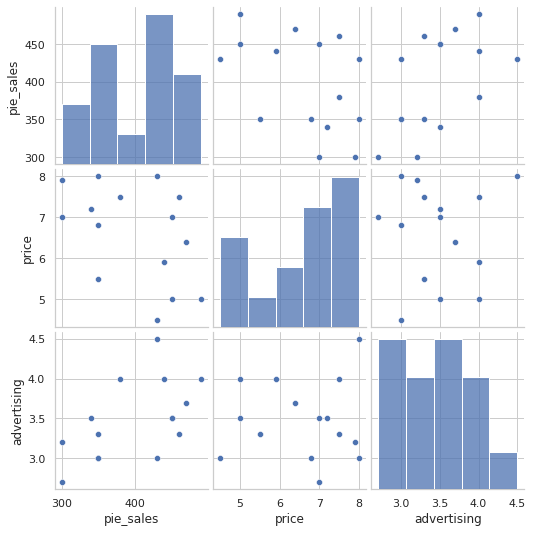

In [3]:
sns.pairplot(df_pie.drop('week', axis=1))

Dari grafik di atas terdapat kemungkinan adanya hubungan antar atribut price dan advertising terhadap atribut pie_sales.

Atribut price dan advertising dianggap sebagai Independent variables (X), dan atribut pie_sales dianggap dianggap sebagai Dependent variable (Y)

Untuk dapat melihat bagaimana bagaimana pengaruh X terhadap Y dapat dilakukan dengan grafik dibawah

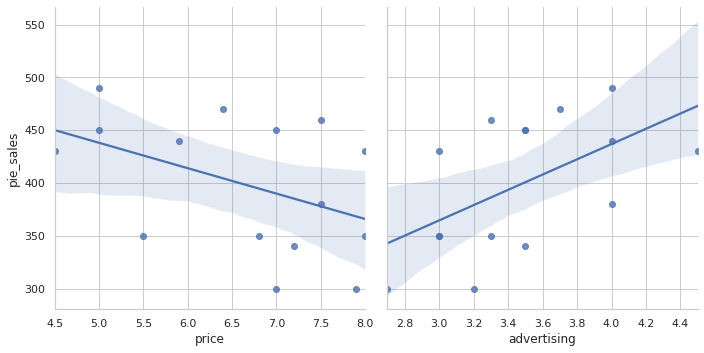

In [4]:
# Visualize the data using scatterplot
g = sns.PairGrid(df_pie, y_vars=["pie_sales"], x_vars=["price", "advertising"], height=5)
g.map(sns.regplot)

Dari scatter di atas dapat dilihat hubungan antara atribut price dengan pie_sales dan atribut advertising dengan pie_sales.

- Pada hubungan antara atribut price dengan pie_sales memiliki *negative relationship*, berarti jika nilai price semakin tinggi, maka pie_sales akan menurun.

- Pada hubungan antara atribut advertising dengan pie_sales memiliki *positive relationship*, berarti jika nilai advertising semakin tinggi, maka pie_sales akan ikut tinggi.



**Multikolinieritas**

Untuk dapat melihat bagaimana setiap Independent variables berkolerasi dengan dependent variables maka bisa melihat pada grafik korelasi

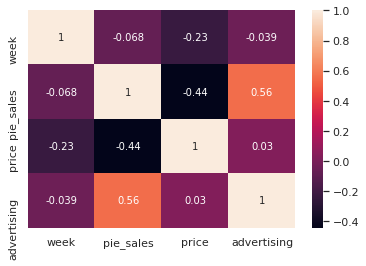

In [5]:
sns.heatmap(df_pie.corr(), annot=True)

Berdasarkan grafik tersebut dapat dilihat bahwa atribut price memiliki korelasi negatif dengan pie_sales, dan atribut advertising memiliki korelasi positif dengan pie_sales. Kedua memiliki nilai korelasi yang mendekati 0, sehingga tidak terdapat kedua atribut tersebut memenuhi sifat independent dan tidak saling mempengaruhi

# **MODEL 1: Regression using Scikit Learn**

In [6]:
df_pie.columns

Index(['week', 'pie_sales', 'price', 'advertising'], dtype='object')

In [7]:
X = df_pie[['price', 'advertising']]
Y = df_pie['pie_sales']

In [8]:
X.head()

,price,advertising
0,5.5,3.3
1,7.5,3.3
2,8.0,3.0
3,8.0,4.5
4,6.8,3.0


In [9]:
Y.head()

0    350
1    460
2    350
3    430
4    350
Name: pie_sales, dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# mengecek nilai intercept dan koefisien pada price dan advertising
print('Intercept: ', regr.intercept_, '\n')
coeffecients = pd.DataFrame(regr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Intercept:  306.5261932837436 



,Coeffecient
price,-24.975090
advertising,74.130957


Model 1 akan membentuk rumus linear regresi yakni:

    y = b0 + b1X1 + b2X2

    y = 306.526 - 24.975(price) + 74.13(advertising)

## **Model 1 - Prediction**


In [12]:
X['price'].mean()

6.613333333333333

In [13]:
X['advertising'].mean()

3.48

In [14]:
# prediksi penjualan dari rata-rata setiap atribut
predictions = regr.predict([[6.6, 3.5]])
print ('Predicted  pie sale: \n', predictions)

Predicted  pie sale: 
 [401.14895368]


In [15]:
# prediksi terhadap X
predictions = regr.predict(X)
print(predictions)

[413.79536065 363.84518161 329.11834961 440.31478584 359.08845703
 415.73685186 416.53116292 420.97016308 391.15891787 478.17457565
 386.16389997 346.44205006 455.69699508 441.10909691 331.85415188]


## **Model 1 - Regression Model Accuracy**

**MAE (Mean absolute error)** mewakili selisih antara nilai asli dan nilai prediksi yang didapatkan dengan rata-rata absolut dari selisih data.

**MSE (Mean Squared Error)** mewakili perbedaan antara nilai asli dan nilai prediksi yang didapat dengan mengkuadratkan selisih rata-rata dari data

**RMSE (Root Mean Squared Error)** adalah tingkat kesalahan menurut akar kuadrat MSE.

**R-squared**  mewakili koefisien seberapa cocok nilai dibandingkan dengan nilai aslinya. Nilai dari 0 hingga 1 diibaratkan sebagai persentase. Semakin mendekati 1, semakin baik modelnya.

In [16]:
from sklearn import metrics

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

Mean Absolute Error: 34.54567364769344
Mean Squared Error: 1802.2204311503622
Root Mean Squared Error: 42.45256683818261


In [18]:
# Koefisien Determinasi
print('R-squared:',metrics.r2_score(Y, predictions))

R-squared: 0.5214779360292288


Nilai RMSE = 42.245 menunjukkan rata-rata perbedaan antara nilai prediksi dan nilai asli yang cukup tinggi.

Nilai R-squared = 0.52 menunjukkan bahwa atribut price dan advertising hanya dapat memprediksi 52% nilai dari keseluruhan nilai pada pie_sales

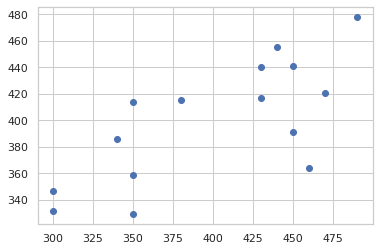

In [19]:
# analisis linearitas 
# berbentuk linear
plt.scatter(Y, predictions)
plt.show()

Bentuk pada grafik yang hampir merata secara diagonal menandakan bahwa ada hubungan linear dari Independent variables dan dependent variable

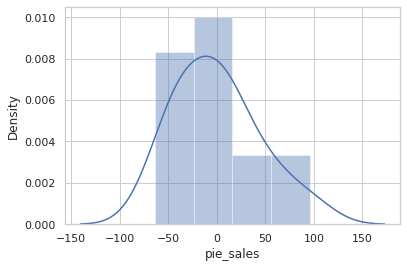

In [20]:
# histogram dari residual untuk mengecek normalitas data
# normalitas data telah bagus
sns.distplot((Y-predictions));

Bentuk diagram menunjukkan diagram yang bisa dianggap memenuhi anggapan bahwa residual terdistribusi dengan normal

# **Model 2: Regression using Scikit Learn with Training Data and Testing Data**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# membagi data menjadi training data dan test data
# 70% sebagai training data dan 30% sebagai testing data
X_train, X_test, y_train, y_test = train_test_split(df_pie[['price', 'advertising']], df_pie['pie_sales'], test_size=0.3, random_state=42)

In [23]:
X_train

,price,advertising
8,7.0,3.5
2,8.0,3.0
1,7.5,3.3
14,7.0,2.7
4,6.8,3.0
7,6.4,3.7
10,7.2,3.5
12,5.9,4.0
3,8.0,4.5
6,4.5,3.0


In [24]:
X_test

,price,advertising
9,5.0,4.0
11,7.9,3.2
0,5.5,3.3
13,5.0,3.5
5,7.5,4.0


In [25]:
regr2 = LinearRegression()
regr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# mengecek nilai intercept dan koefisien pada price dan advertising
print('Intercept: ', regr2.intercept_, '\n')
coeffecients = pd.DataFrame(regr2.coef_,X_train.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Intercept:  308.3986635404084 



,Coeffecient
price,-21.996168
advertising,71.296831


Model 2 akan membentuk rumus linear regresi yakni:

    y = b0 + b1X1 + b2X2

    y = 308.398 - 21.996(price) + 71.296(advertising)

## **Model 2 - Prediction**

In [27]:
predictions2 = regr2.predict(X_test)
predictions2

array([483.60514837, 362.77879799, 422.69928315, 447.95673305,
       428.61472951])

## **Model 2 - Regression Model Accuracy**

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

Mean Absolute Error: 38.50618584899097
Mean Squared Error: 2326.9648482759003
Root Mean Squared Error: 48.23862402967046


In [29]:
# Koefisien Determinasi
print('R-squared:',metrics.r2_score(y_test, predictions2))

R-squared: 0.5010795779854416


Nilai RMSE = 48.23 menunjukkan rata-rata perbedaan antara nilai prediksi dan nilai asli yang cukup tinggi.

Nilai R-squared = 0.5 bahwa atribut price dan advertising hanya dapat memprediksi 50% nilai dari keseluruhan nilai pada pie_sales

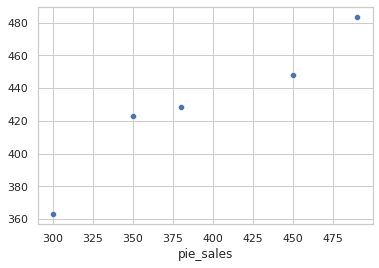

In [30]:
# analisis linearitas 
# berbentuk linear
sns.scatterplot(y_test,predictions2)

Bentuk pada grafik yang hampir merata secara diagonal menandakan bahwa ada hubungan linear dari Independent variables dan dependent variable

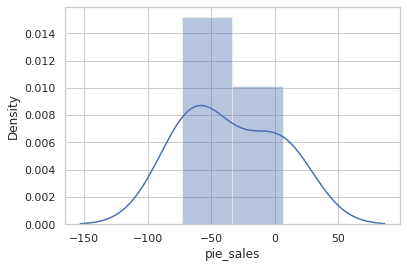

In [31]:
# histogram dari residual untuk mengecek normalitas data
# normalitas data sedikit 
sns.distplot((y_test-predictions2));

Bentuk diagram menunjukkan diagram yang bisa dianggap memenuhi anggapan bahwa residual terdistribusi dengan normal

# **Regression using Statsmodels Model 1**

Jumlah data (n) = 15

Jumlah independent variable (k) = 2

In [32]:
import statsmodels.api as sm

In [33]:
X = sm.add_constant(X) # adding a constant

In [34]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Thu, 22 Oct 2020   Prob (F-statistic):             0.0120
Time:                        04:49:55   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

### **ANALISIS MODEL 1**

Berikut adalah analisis dari statmodel untuk model 1:

Jumlah data (n)= 15

Jumlah Independent variables (k)= 2

### **R-squared**
Dikarenakan jumlah Independent varibels adalah 2 maka digunakan R-squared, karena Adjusted R-squared digunakan untuk regresi dengan lebih dari dua Independent variables. 

Nilai **R-squared = 0.521** menunjukkan bahwa atribut price dan advertising hanya mempengaruhi price_sales sebesar 52.1% dan terdapat 47.9% dipengaruhi oleh atribut lain yang mungkin tidak dimasukkan ke dalam data.


---


### **Autocorrelation dengan Durbin Watson**
H0: tidak terdapat autocorrelation

H1: ada autocorrelation

Nilai **Durbin-Watson (D)=1.683**. Berdasarkan pada tabel Durbin-Watson untuk n=15 dan k=2. 

dL=0.9455 

dU=1.5432. 

4-dU=2.4568

4-dL=3.0545 

**D > dU dan D < 4-dU**

Sehingga H0 diterima

Membuktikan **tidak ada autocorrelation** pada data.


---



### **F-Test**
H0: tidak terdapat autocorrelation

H1: ada autocorrelation

**Dengan menggunakan F-Test**

Nilai **F-statistic=6.539**.

Tingkat signifikansi menggunakan $\alpha$= 5% atau 0.05.

Dengan n=15, k=2

Maka, 

df1 = 2

df2 = 12

Berdasarkan table distribusi F maka nilai **F=3.89**

**F-statistic > F**, artinya secara signifikan atribut price dan advertising secara bersama-sama berpengaruh terhadap pie_sales. 


---


### **T-Test**
H0: Secara parsial tidak ada pengaruh yang terlalu signifikan

Ha: Secara parsial ada pengaruh yang signifikan

**Atribut Price**

Tingkat signifikansi menggunakan $\alpha$ = 5% atau 0.05.

Dengan t=-2.306

Dengan alpha = 5%/2 = 2.5% (uji 2 sisi)

df = 12

maka berdasarkan table distribusi T maka nilai T = 2.17881.

**-t < -T**, H0 ditolak dan artinya secara parsial ada pengaruh signifikan antara Price dengan pie_sales. 

**Atribut Advertising**

Tingkat signifikansi menggunakan $\alpha$ = 5% atau 0.05.

Dengan t=2.855

Dengan alpha = 5%/2 = 2.5% (uji 2 sisi)

df = 12

maka berdasarkan table distribusi T maka nilai T = 2.17881.

**t > T**, H0 ditolak, artinya secara parsial ada pengaruh signifikan antara advertising dengan pie_sales. 

Kesimpulan pada t-Tes menunjukkan bahwa atribut price dan atribut advertising sama-sama memiliki pengaruh yang signifikan terhadap pie_sales



# **Regression using Statsmodels Model 2**

Jumlah data (n) = 10

Jumlah independent variable (k) = 2

In [35]:
X_t = sm.add_constant(X_train) # adding a constant

In [36]:
model2 = sm.OLS(y_train, X_t).fit()
predictions2 = model2.predict(X_t) 

print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     3.036
Date:                Thu, 22 Oct 2020   Prob (F-statistic):              0.112
Time:                        04:49:55   Log-Likelihood:                -51.569
No. Observations:                  10   AIC:                             109.1
Df Residuals:                       7   BIC:                             110.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         308.3987    140.351      2.197      



---



---



### **ANALISIS MODEL 2**

Berikut adalah analisis dari statmodel untuk model 2:

Jumlah training data (n)= 10

Jumlah Independent variables (k)= 2

**R-squared**

Nilai **R-squared = 0.465** menunjukkan bahwa atribut price dan advertising hanya mempengaruhi price_sales sebesar 45.6% dan terdapat 64.4% dipengaruhi oleh atribut lain yang mungkin tidak dimasukkan ke dalam data.


---


**Autocorrelation dengan Durbin Watson**

H0: tidak terdapat autocorrelation

H1: ada autocorrelation

Nilai **Durbin-Watson (D)=2.290**. Berdasarkan pada tabel Durbin-Watson untuk n=10 dan k=2 

dL=0.6972

dU=1.6413

4-dU=2.3587

4-dL=3.3028

**D > dU dan D < 4-dL** 

Sehingga H0 diterima.

Membuktikan **tidak ada autocorrelation** pada data.


---



**F-Test**

H0: Secara bersamaan tidak ada pengaruh yang terlalu signifikan

Ha: Secara bersamaan ada pengaruh yang signifikan

**Dengan menggunakan F-Test**

Nilai **F-statistic=3.036**.

Tingkat signifikansi menggunakan $\alpha$= 5% atau 0.05.

Dengan n=10, k=2

Maka, 

df1 = 2

df2 = 7

Berdasarkan table distribusi F maka nilai **F=4.74**

**F-statistic < F**, artinya H0 ditolak dan secara signifikan atribut price dan advertising secara bersama-sama tidak berpengaruh terhadap pie_sales. 


---


**T-Test**

H0: Secara parsial tidak ada pengaruh yang terlalu signifikan

Ha: Secara parsial ada pengaruh yang signifikan

**Atribut Price**

Tingkat signifikansi menggunakan $\alpha$ = 5% atau 0.05.

Dengan t=-1.352

Dengan alpha = 5%/2 = 2.5% (uji 2 sisi)

df = 7

maka berdasarkan table distribusi T maka nilai T = -2.36462

**-t > -T**, artinya H0 diterima dan secara parsial tidak ada pengaruh signifikan antara atribut price dengan pie_sales. 

**Atribut Advertising**

Tingkat signifikansi menggunakan $\alpha$ = 5% atau 0.05.

Dengan t=2.274

Dengan alpha = 5%/2 = 2.5% (uji 2 sisi)

df = 7

maka berdasarkan table distribusi T maka nilai T = 2.36462

**t < T**, artinya H0 diterima dan secara parsial tidak ada pengaruh signifikan antara atribut advertising dengan pie_sales. 

Kesimpulan pada t-Tes menunjukkan bahwa atribut price dan atribut advertising sama-sama memiliki pengaruh yang tidak terlalu signifikan terhadap pie_sales

# KESIMPULAN

Model 1 dan Model 2 sama-sama dapat memprediksi bagaimana pie_sales berdasarkan atribut price dan advertising, sama-sama tidak memiliki autocorrelation. 

Untuk model 1 memiliki RMSE=42.245 dan R-squared=0.52. Sedangkankan model 2 memiliki RMSE=48.23 dan R-squared=0.5. Model 1 memiliki tingkat selisih antara data prediksi dan data asli yang lebih sedikit daripada model 2, sehingga dapat memprediksi dengan lebih akurat ketimbang model 2. 

Mesikupun model 1 memiliki performa yang lebih baik daripada model 2, akan tetapi nilainya masih kurang bagus. Selisih rata-rata dari model masih cukup besar dan Dikarenakan dataset hanya berjumlah 15 baris, maka dirasa kurang untuk membuat model linear regresi yang ideal. 

Dilihat dari model statistik berdasarkan model 1, bahwa atribut price dan advertising hanya dapat mempengaruhi 52.1% nilai prediksi, 47.9% dipengaruhi atribut lain yang mungkin tidak dimasukkan dalam dataset.



---



Referensi

http://duwiconsultant.blogspot.com/2011/11/analisis-regresi-linier-berganda.html#:~:text=Adjusted%20R%20Square%20adalah%20nilai,R2%20sebagai%20koefisien%20determinasi.

https://www.bilsonsimamora.com/multivariat/autocorrelation-test/